# ANALISIS PARA A LIMPIEZA DE DATOS DE NETFLIX CON PYTHON Y PANDAS

# 1. Introducción

Netflix es una de las plataformas de transmisión de video y medios más populares. Tienen más de 8.000 películas o programas de televisión disponibles en su plataforma y, a mediados de 2024, tienen más de 282 millones de suscriptores en todo el mundo. Este conjunto de datos tabulares consta de listados de todas las películas y programas de televisión disponibles en Netflix, junto con detalles como: reparto, directores, calificaciones, año de lanzamiento, duración y más.

#2. El set de datos

La información recolectada de la empresa se encuentra en un archivo CSV (`netflix_titles.csv`) con 45215 filas y 17 columnas.

Cada registro contiene 12 características. Las columnas son:

- show_id: **Identificador único para cada show (s1, s2).**  
- type: **Especifica si el título es una "Película" o una "Serie de TV".**  
- title: **El nombre del título de Netflix.**  
- director: **El director del título.**  
- cast: **Los actores principales involucrados en el título.**  
- country: **El país donde se produjo el título.**  
- date_added: **La fecha en que el título se agregó a Netflix.**  
- release_year: **El año en que el título fue lanzado originalmente.**  
- rating: **La clasificación de contenido ("PG-13", "TV-MA").**  
- duration: **La duración de la película (en minutos) o el número de temporadas para series de TV.**  
- listed_in: **Las categorías o géneros en los que se clasifica el título ("Documentaries", "TV Dramas").**  
- description: **La descripción resumida.**

#3. Una primera mirada al dataset

In [5]:
# Importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Lectura
df = pd.read_csv("netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [7]:
# Vemos la forma del dataset
df.shape

(8807, 12)

In [8]:
# Veamos las variables categóricas y las numéricas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


# 4. Limpieza

Realizaremos el proceso de limpieza teniendo en cuenta las situaciones más comunes:

1. Datos faltantes en algunas celdas
2. Columnas irrelevantes (que no responden al problema que queremos resolver)
3. Registros (filas) repetidos
4. Valores extremos (*outliers*) en el caso de las variables numéricas. Se deben analizar en detalle pues no necesariamente la solución es eliminarlos
5. Errores tipográficos en el caso de las variables categóricas

Al final de este proceso de limpieza deberíamos tener un set de datos **íntegro**, listo para la fase de Análisis Exploratorio.

## 4.1 Datos faltantes

Acá comenzamos a ver que los datos no están completos, pues no todas las columnas tienen la misma cantidad de registros.

El número total de registros debería ser 45.215. Sin embargo columnas como "job", "marital", "education", "balance", "duration" y "pdays".

Por ser tan pocos los datos  faltantes optaremos por eliminar las filas correspondientes:

In [11]:
#Eliminar datos flatantes, en este caso son muy pocos y no afectan al dataframe
df.dropna(inplace= True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5332 entries, 7 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       5332 non-null   object
 1   type          5332 non-null   object
 2   title         5332 non-null   object
 3   director      5332 non-null   object
 4   cast          5332 non-null   object
 5   country       5332 non-null   object
 6   date_added    5332 non-null   object
 7   release_year  5332 non-null   int64 
 8   rating        5332 non-null   object
 9   duration      5332 non-null   object
 10  listed_in     5332 non-null   object
 11  description   5332 non-null   object
dtypes: int64(1), object(11)
memory usage: 541.5+ KB


Pasamos de 8807 registros a 5332, lo que quiere decir que había muchos registros con valores nulos

## 4.2 Columnas irrelevantes

Una columna irrelevante puede ser:

- **Una columna que no contiene información relevante para el problema que queremos resolver**.
- **Una columna categórica pero con un sólo nivel**. 
- **Una columna numérica pero con un sólo valor**.
- **Columnas con información redundante**.

Si tenemos la duda de si alguna columna puede ser relevante o no lo mejor es dejarla (y más adelante en posteriores etapas podremos darnos cuenta de si se debe preservar o no).

En este caso todas las columnas pueden resultar relevantes, pero debemos verificar que no haya columnas categóricas con un sólo nivel, o columnas numéricas con un sólo valor:

In [13]:
# Conteo de los niveles en las diferentes columnas categóricas
cols_cate = ['type','title', 'director', 'cast', 'country', 'date_added', 'rating', 'duration', 'listed_in', 'description']

# Conteo de los valores diferentes pod columna
for col in cols_cate:
    print(f"Columna {col} : {df[col].unique()}, {df[col].nunique()} subniveles")

Columna type : ['Movie' 'TV Show'], 2 subniveles
Columna title : ['Sankofa' 'The Great British Baking Show' 'The Starling' ... 'Zombieland'
 'Zoom' 'Zubaan'], 5332 subniveles
Columna director : ['Haile Gerima' 'Andy Devonshire' 'Theodore Melfi' ... 'Majid Al Ansari'
 'Peter Hewitt' 'Mozez Singh'], 3945 subniveles
Columna cast : ['Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra Duah, Nick Medley, Mutabaruka, Afemo Omilami, Reggie Carter, Mzuri'
 'Mel Giedroyc, Sue Perkins, Mary Berry, Paul Hollywood'
 "Melissa McCarthy, Chris O'Dowd, Kevin Kline, Timothy Olyphant, Daveed Diggs, Skyler Gisondo, Laura Harrier, Rosalind Chao, Kimberly Quinn, Loretta Devine, Ravi Kapoor"
 ...
 'Jesse Eisenberg, Woody Harrelson, Emma Stone, Abigail Breslin, Amber Heard, Bill Murray, Derek Graf'
 'Tim Allen, Courteney Cox, Chevy Chase, Kate Mara, Ryan Newman, Michael Cassidy, Spencer Breslin, Rip Torn, Kevin Zegers'
 'Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanana, Manish Chaudhary, Meghna Malik, Malkeet Rauni,

Todas las columnas categóricas tienen más de 1 subnivel. No eliminaremos ninguna, cabe destacar que el número de subniveles en Titulos son 5332, que es igual al total de registros por lo que se intuye que todas las peliculas son diferentes por lo que hasta ahora no veo necesario ningun cambio.

Verifiquemos lo que ocurre con las columnas numéricas:

In [15]:
df.describe()

,release_year
count,5332.000000
mean,2012.742123
std,9.625831
min,1942.000000
25%,2011.000000
50%,2016.000000
75%,2018.000000
max,2021.000000


Todas las columnas numéricas tienen desviaciones estándar ("std") diferentes de cero, lo que indica que no tienen un único valor.

Preservaremos todas las columnas numéricas.

## 4.3 Filas repetidas

In [18]:
print(f"Tamaño del SET de datos antes de eliminar filas repetidas: {df.shape}")
df.drop_duplicates(inplace = True)
print(f"Tamaño del SET de datos despues de eliminar filas repetidas: {df.shape}")

Tamaño del SET de datos antes de eliminar filas repetidas: (5332, 12)
Tamaño del SET de datos despues de eliminar filas repetidas: (5332, 12)


No hay filas repetidas, cada contenido es diferente

## 4.4 *Outliers* en las variables numéricas

No siempre se deben eliminar los *outliers* porque dependiendo de la variable numérica analizada estos pueden contener información importante.

Creemos gráficas tipo "boxplot" de las columnas numéricas:

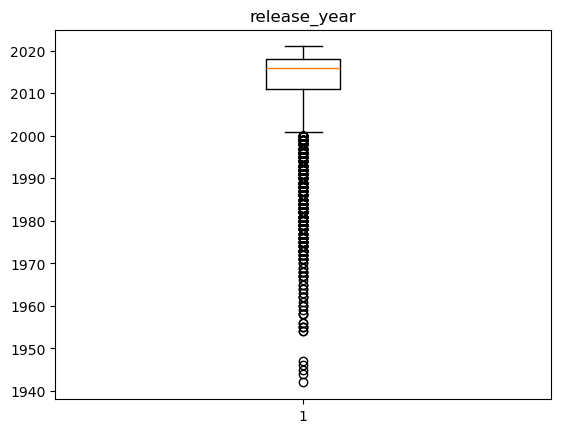

In [21]:
# Generar gráficas individuales pues las variables numéricas
# están en rangos diferentes
cols_num = ['release_year']

# Crear un boxplot
plt.boxplot(df['release_year'])
plt.title('release_year')
plt.show()

**Observaciones:**
- "release_year": Todas las series y peliculas registradas son de antes del año 2000, sin embargo hay valores que se alejan de el grupo principal aproximadamente antes de 1950, podriamos decir que los valores antes de ese año son outlayers

In [23]:
# Eliminar filas con "release_year"<1950
# Crear un boxplot
print(f"Número de filas antes de eliminar resgistros por 'release_year': {df.shape}")
df = df[df['release_year'] > 1950]
print(f"Número de filas despues de eliminar resgistros por 'release_year': {df.shape}")

Número de filas antes de eliminar resgistros por 'release_year': (5332, 12)
Número de filas despues de eliminar resgistros por 'release_year': (5327, 12)


La cantidad de valores distanciados demuestran ser apenas 5 contenidos, por lo que pienso que su limpieza es lo mejor para el general del conjunto de datos

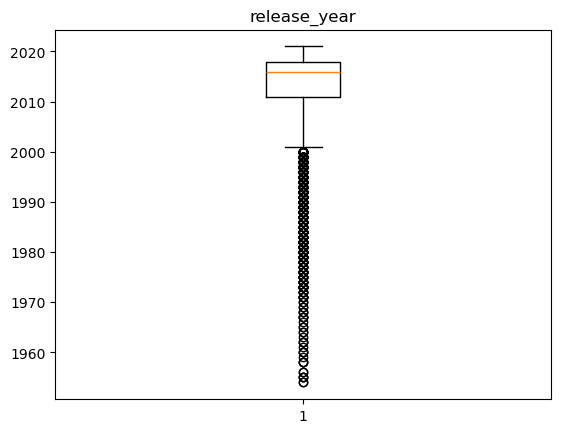

In [25]:
# Crear un boxplot actualizado
plt.boxplot(df['release_year'])
plt.title('release_year')
plt.show()

## 4.5 Errores tipográficos en variables categóricas

En este caso, es impractico graficar datos como los titulos, id_show o descripciones, ya que estos datos son normalmente diferentes en todas las peliculas, al igual que campos que no necesariamente nos dan datos con un valor significativo.
También debido a la extensa cantidad de subniveles en algunas categorías, los datos serían muy dificiles de interpretar.


In [27]:
# Conteo de los valores diferentes pod columna
for col in cols_cate:
    print(f"Columna {col} : {df[col].unique()}, {df[col].nunique()} subniveles")

Columna type : ['Movie' 'TV Show'], 2 subniveles
Columna title : ['Sankofa' 'The Great British Baking Show' 'The Starling' ... 'Zombieland'
 'Zoom' 'Zubaan'], 5327 subniveles
Columna director : ['Haile Gerima' 'Andy Devonshire' 'Theodore Melfi' ... 'Majid Al Ansari'
 'Peter Hewitt' 'Mozez Singh'], 3940 subniveles
Columna cast : ['Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra Duah, Nick Medley, Mutabaruka, Afemo Omilami, Reggie Carter, Mzuri'
 'Mel Giedroyc, Sue Perkins, Mary Berry, Paul Hollywood'
 "Melissa McCarthy, Chris O'Dowd, Kevin Kline, Timothy Olyphant, Daveed Diggs, Skyler Gisondo, Laura Harrier, Rosalind Chao, Kimberly Quinn, Loretta Devine, Ravi Kapoor"
 ...
 'Jesse Eisenberg, Woody Harrelson, Emma Stone, Abigail Breslin, Amber Heard, Bill Murray, Derek Graf'
 'Tim Allen, Courteney Cox, Chevy Chase, Kate Mara, Ryan Newman, Michael Cassidy, Spencer Breslin, Rip Torn, Kevin Zegers'
 'Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanana, Manish Chaudhary, Meghna Malik, Malkeet Rauni,

Inicialmente pueden existir sub-niveles con el mismo nombre pero escritos en minúscula, en mayúscula o con la primera letra en mayúscula.

Unifiquemos estos sub-niveles inicialmente:

In [30]:
# obtener las columnas con valores numericos
cols_numericos = df._get_numeric_data().columns
# obtener las columnas con valores categoricos
cols_categoricos = df.select_dtypes(include=['object']).columns

# Representar en minúsculas solo si la columna es categórica
for column in df.columns:
    if column in cols_categoricos:
        df[column] = df[column].str.lower()

# Conteo de los valores diferentes por columna
for col in cols_cate:
    print(f"Columna {col}: {df[col].unique()}, {df[col].nunique()} subniveles")

Columna type: ['movie' 'tv show'], 2 subniveles
Columna title: ['sankofa' 'the great british baking show' 'the starling' ... 'zombieland'
 'zoom' 'zubaan'], 5325 subniveles
Columna director: ['haile gerima' 'andy devonshire' 'theodore melfi' ... 'majid al ansari'
 'peter hewitt' 'mozez singh'], 3938 subniveles
Columna cast: ['kofi ghanaba, oyafunmike ogunlano, alexandra duah, nick medley, mutabaruka, afemo omilami, reggie carter, mzuri'
 'mel giedroyc, sue perkins, mary berry, paul hollywood'
 "melissa mccarthy, chris o'dowd, kevin kline, timothy olyphant, daveed diggs, skyler gisondo, laura harrier, rosalind chao, kimberly quinn, loretta devine, ravi kapoor"
 ...
 'jesse eisenberg, woody harrelson, emma stone, abigail breslin, amber heard, bill murray, derek graf'
 'tim allen, courteney cox, chevy chase, kate mara, ryan newman, michael cassidy, spencer breslin, rip torn, kevin zegers'
 'vicky kaushal, sarah-jane dias, raaghav chanana, manish chaudhary, meghna malik, malkeet rauni, ani

In [32]:
df.shape

(5327, 12)

¡Y listo, ya hemos realizado la limpieza de nuestro set de datos!

Originalmente tenía 8.807 registros y 12 columnas. El dataset resultante tiene 5.327 filas (3480 menos) y 12 columnas.

El set de datos ya está listo para el Análisis Exploratorio.

In [36]:
# Guardar el dataset PIZANO GÁlVEZ PABLO YAHIR
df.to_csv('dataset_banco_clean.csv')